In [1]:
import cv2
import openpifpaf
from tensorflow import keras
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

openpifpaf.show.Canvas.show = True
openpifpaf.show.Canvas.image_min_dpi = 200

In [2]:
class2idx = {
    "angry":0,
    "disgust":1,
    "fear":2,
    "happy":3,
    "neutral":4,
    "sad":5,
    "surprise":6
}

idx2class = {
    0:"angry",
    1:"disgust",
    2:"fear",
    3:"happy",
    4:"neutral",
    5:"sad",
    6:"surprise"
}

In [3]:
def display(img):
    plt.imshow(img)
    plt.show()

def listdir_nohidden(path):
    ans = []
    for f in os.listdir(path):
        if not f.startswith('.'):
            ans.append(f)
    return ans

In [4]:
data = '15'
img = cv2.imread('dataTest/'+data+'.jpg')

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
crop_img = []
for (x,y,w,h) in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    crop_img.append([img[y:y+h, x:x+w],x,y,w,h])

if len(crop_img)==0 :
    crop_img = None


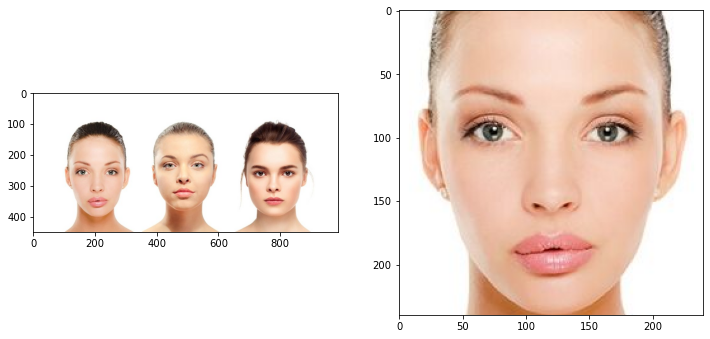

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(crop_img[0][0], cv2.COLOR_BGR2RGB))

In [10]:
image = cv2.cvtColor(crop_img[0][0], cv2.COLOR_BGR2RGB)

In [71]:
predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16-wholebody')
predictions, gt_anns, meta = predictor.numpy_image(image)

In [75]:
predictions

[]

In [72]:
faceKey = predictions[0].data[24:92]

IndexError: list index out of range

In [42]:
for i in faceKey:
    i[0] = i[0]/crop_img[0].shape[0]
    i[1] = i[1]/crop_img[0].shape[1]



AttributeError: 'list' object has no attribute 'shape'

In [9]:
model = keras.models.load_model('modelANN_NoDrop_optimal.h5')

In [10]:
y_pred = model.predict(faceKey.reshape(1,204))
y_pred_class=np.argmax(y_pred,axis=1)



In [11]:
idx2class[y_pred_class[0]]


'neutral'

In [55]:
model = keras.models.load_model('modelANN_NoDrop_optimal.h5')

response = []
for j in crop_img :
    image = cv2.cvtColor(j[0], cv2.COLOR_BGR2RGB)
    predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16-wholebody')
    predictions, gt_anns, meta = predictor.numpy_image(image)
    faceKey = predictions[0].data[24:92]
    for i in faceKey:
        i[0] = i[0]/j[0].shape[0]
        i[1] = i[1]/j[0].shape[1]
    y_pred = model.predict(faceKey.reshape(1,204))
    y_pred_class=np.argmax(y_pred,axis=1)
    response.append({"face" : [idx2class[y_pred_class[0]],j[1],j[2],j[3],j[4]]})

print(response)


[{'face': ['neutral', 369, 134, 238, 238]}, {'face': ['neutral', 662, 163, 238, 238]}, {'face': ['neutral', 88, 161, 240, 240]}]


In [52]:
for j in crop_img :
    print(j[0].shape)

(238, 238, 3)
(238, 238, 3)
(240, 240, 3)


In [49]:
crop_img[0][0].shape

(238, 238, 3)

In [6]:
model = keras.models.load_model('modelANN_NoDrop_optimal.h5')

response = []
for j in crop_img :
    image = cv2.cvtColor(j[0], cv2.COLOR_BGR2RGB)
    predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16-wholebody')
    predictions, gt_anns, meta = predictor.numpy_image(image)
    faceKey = predictions[0].data[24:92]
    for i in faceKey:
        i[0] = i[0]/j[0].shape[0]
        i[1] = i[1]/j[0].shape[1]
    
    y_pred = model.predict(faceKey.reshape(1,204))
    y_pred_class=np.argmax(y_pred,axis=1)
    response.append({"Emotion": idx2class[y_pred_class[0]], "X" : j[1].tolist(), "Y" : j[2].tolist(), "Width" : j[3].tolist(), "Height" : j[4].tolist()})



print(response)

[{'Emotion': 'neutral', 'X': 369, 'Y': 134, 'Width': 238, 'Height': 238}, {'Emotion': 'neutral', 'X': 88, 'Y': 161, 'Width': 240, 'Height': 240}, {'Emotion': 'neutral', 'X': 662, 'Y': 163, 'Width': 238, 'Height': 238}]


In [13]:
img.shape

(450, 988, 3)

In [7]:
input_img = img
img_h, img_w, _ = np.shape(input_img)

for i, d in enumerate(response):
    x1, y1,w, h = d['X'], d['Y'], d['Width'], d['Height']
    cv2.rectangle(img, (x1, y1), (x1+w, y1+h), (255, 0, 0), 2)
    cv2.putText(img, d['Emotion'], (x1, y1), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

cv2.imwrite("15_Answer.jpg", img)


True

In [15]:
for i, d in enumerate(response):
    x1, y1,w, h = d['X'], d['Y'], d['Width'], d['Height']
    cv2.rectangle(img, (x1, y1), (x1+w, y1+h), (255, 0, 0), 2)


{'Emotion': 'neutral', 'X': 369, 'Y': 134, 'Width': 238, 'Height': 238}

In [24]:
response[0]['X']

369

In [1]:
response

NameError: name 'response' is not defined

In [ ]:
model = keras.models.load_model('modelCNNnoGen_optimal.h5')

response = []
for j in crop_img :
    image = cv2.cvtColor(j[0], cv2.COLOR_BGR2RGB)
    predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16-wholebody')
    predictions, gt_anns, meta = predictor.numpy_image(image)
    faceKey = predictions[0].data[24:92]
    for i in faceKey:
        i[0] = i[0]/j[0].shape[0]
        i[1] = i[1]/j[0].shape[1]
    
    y_pred = model.predict(faceKey.reshape(1,204))
    y_pred_class=np.argmax(y_pred,axis=1)
    response.append({"Emotion": idx2class[y_pred_class[0]], "X" : j[1].tolist(), "Y" : j[2].tolist(), "Width" : j[3].tolist(), "Height" : j[4].tolist()})



print(response)

In [6]:
model = keras.models.load_model('modelCNNnoGen_optimal.h5')

response = []
for j in crop_img :
    image = cv2.cvtColor(j[0], cv2.COLOR_BGR2RGB)
    predictor = openpifpaf.Predictor(checkpoint='shufflenetv2k16-wholebody')
    predictions, gt_anns, meta = predictor.numpy_image(image)
    faceKey = predictions[0].data[24:92]
    for i in faceKey:
        i[0] = i[0]/j[0].shape[0]
        i[1] = i[1]/j[0].shape[1]
    
    y_pred = model.predict(faceKey.reshape(1,204))
    y_pred_class=np.argmax(y_pred,axis=1)
    response.append({"Emotion": idx2class[y_pred_class[0]], "X" : j[1].tolist(), "Y" : j[2].tolist(), "Width" : j[3].tolist(), "Height" : j[4].tolist()})



print(response)

In [11]:
len(crop_img)

3

In [18]:
X =[]

for image in crop_img:
    resized_img = cv2.resize(image[0],(48,48))
    X.append(resized_img)


In [20]:
X = np.array(X)

In [21]:
X = X/255

In [22]:
y_pred= model.predict(X)
y_pred_class=np.argmax(y_pred,axis=1)

In [23]:
y_pred_class

array([6, 6, 6])

In [25]:
image_labels_dic_idx2class={
    
    
    0:'Angry',
    1:'Disgust',
    2:'Fear',
    3:'Happy',
    4:'Sad',
    5:'Surprise',
    6:'Neutral',
}

In [41]:
model = keras.models.load_model('modelCNNnoGen_optimal.h5')
X =[]

for image in crop_img:
    resized_img = cv2.resize(image[0],(48,48))
    X = np.array(resized_img)
    X = X/255
    y_pred= model.predict(X.reshape(1,48,48,3))
    y_pred_class=np.argmax(y_pred,axis=1)
    y_pred_class

In [33]:
X.shape

(3, 48, 48, 3)

In [47]:
model = keras.models.load_model('modelCNNnoGen_optimal.h5')
X =[]
response = []


for image in crop_img:
    resized_img = cv2.resize(image[0],(48,48))
    X.append(resized_img)
X = np.array(X)
X = X/255
y_pred= model.predict(X)
y_pred_class=np.argmax(y_pred,axis=1)
y_pred_class
for i, j in enumerate(crop_img):
    response.append({"Emotion": image_labels_dic_idx2class[y_pred_class[i]], "X" : j[1].tolist(), "Y" : j[2].tolist(), "Width" : j[3].tolist(), "Height" : j[4].tolist()})



In [48]:
response

[{'Emotion': 'Neutral', 'X': 88, 'Y': 161, 'Width': 240, 'Height': 240},
 {'Emotion': 'Neutral', 'X': 662, 'Y': 163, 'Width': 238, 'Height': 238},
 {'Emotion': 'Neutral', 'X': 369, 'Y': 134, 'Width': 238, 'Height': 238}]